Results
Optimal dual variable values:  [1. 1.]
Jacobian matrix at optimum [0.86481736        nan]

-- MEAN VALUES (pre/post) --
US Services PMI            0.381618
Eurozone Core Inflation    1.384904
dtype: float64
US Services PMI            0.052974
Eurozone Core Inflation    0.180254
dtype: float64

-- VOLATILITY (pre/post) --
US Services PMI            7.704543
Eurozone Core Inflation    2.097804
dtype: float64
US Services PMI            7.704543
Eurozone Core Inflation    2.097804
dtype: float64

-- CORRELATION (pre/post) --
-0.06681775452720926
-0.06728649892952807


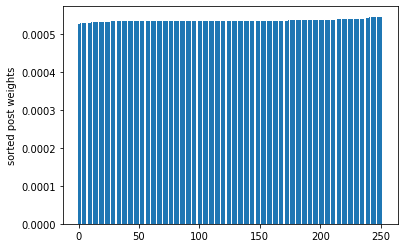

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import entropy_pooling as ep
data = ep.views.load()
(A,b,C,d) = data
#print(A,b)
scenarios = pd.read_excel("data.xlsx")
sample = scenarios[['US Services PMI','Eurozone Core Inflation']]

def weighted_mean(x, w):
    """Weighted Mean"""
    #print((x).size)
    #print((w).size)
    return np.sum(np.array(x) * np.array(w)) / np.sum(w)

def weighted_std(values, weights):
    avg = np.sum(values * weights) / np.sum(weights)
    # Fast and numerically precise:
    variance = np.sum((values-avg)**2 * weights) / np.sum(weights)
    res = np.sqrt(variance)
    return pd.DataFrame([res], columns=values.columns).mean() # mean just to format the rows to one

def weighted_cov(x,y, weights):
    weights = np.asarray(weights.T)[0] # formatting magic
    avg_x = np.sum(x * weights) / np.sum(weights)
    avg_y = np.sum(y * weights) / np.sum(weights)
    res = np.sum((x-avg_x)*(y-avg_y)*weights) / np.sum(weights)
    return res

def weighted_cov1(x, y, w):
    return np.sum(w * np.array(x - weighted_mean(x, w)) * np.array(y - weighted_mean(y, w))) / np.sum(w)

def weighted_corr(x, y, w):
    return weighted_cov(x, y, w) / np.sqrt(weighted_cov(x, x, w) * weighted_cov(y, y, w))

def print_means(scenarios, weights):
    means = sample.multiply(weights,axis=0).sum()
    print(((1+means/100)**12-1)*100) # out in precentages 0.06 => 6 %

def print_vols(scenarios, weights):
    print(weighted_std(sample, post) * np.sqrt(12)) # out in precentages 0.06 => 6 %

m,n = scenarios.shape
pre = np.ones((1,m)).T/m
post = ep.entropy_minimizer.full_confidence_posterior(pre, A, b, C, d)
post = np.array([post]).T

scenarios = pd.read_excel("data.xlsx")
sample = scenarios[['US Services PMI','Eurozone Core Inflation']]

# Annualized
print('\n-- MEAN VALUES (pre/post) --')
print_means(sample, pre)
print_means(sample, post)

print('\n-- VOLATILITY (pre/post) --')
print_vols(sample, np.ones((1,m)).T/m)
print_vols(sample, post)

print('\n-- CORRELATION (pre/post) --')	
print(weighted_corr(sample['Eurozone Core Inflation'], sample['US Services PMI'], pre))
print(weighted_corr(sample['Eurozone Core Inflation'], sample['US Services PMI'], post))

plt.bar(range(len(post)),np.sort(post.T[0]))
plt.ylabel('sorted post weights')
plt.show()

In [2]:
# Number of points "active" in post
# limit the values of w's elements to 1/n, and sum them up => percentage of active points

fraction = np.array([post.T[0], 1/post.size + post.T[0]*0]).min(axis=0).sum()
if fraction * post.size <= 20:
    print('Warning! Small data sample recovered!')
print("{:.1f} % of datapoints still active.".format( fraction * 100 ))
print("{:.1f} datapoints still active.".format( fraction * post.size ))

13.5 % of datapoints still active.
34.1 datapoints still active.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import entropy_pooling as ep

data = ep.views.load_debug()
print(data)

-30
<class 'numpy.int64'>
-30
<class 'numpy.int64'>
(array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.

c:\Users\lapam\Documents\Git\entropy-poolin\entropy_pooling\views.py:104: RuntimeWarning: invalid value encountered in power
